In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [19]:
train_df = pd.read_csv('../data/train_sessions.csv')

In [3]:
train_df.head()

,session_id,site1,time1,site2,time2,site3,time3,site4,time4,site5,...,time6,site7,time7,site8,time8,site9,time9,site10,time10,target
0,1,718,2014-02-20 10:02:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2,890,2014-02-22 11:19:50,941.0,2014-02-22 11:19:50,3847.0,2014-02-22 11:19:51,941.0,2014-02-22 11:19:51,942.0,...,2014-02-22 11:19:51,3847.0,2014-02-22 11:19:52,3846.0,2014-02-22 11:19:52,1516.0,2014-02-22 11:20:15,1518.0,2014-02-22 11:20:16,0
2,3,14769,2013-12-16 16:40:17,39.0,2013-12-16 16:40:18,14768.0,2013-12-16 16:40:19,14769.0,2013-12-16 16:40:19,37.0,...,2013-12-16 16:40:19,14768.0,2013-12-16 16:40:20,14768.0,2013-12-16 16:40:21,14768.0,2013-12-16 16:40:22,14768.0,2013-12-16 16:40:24,0
3,4,782,2014-03-28 10:52:12,782.0,2014-03-28 10:52:42,782.0,2014-03-28 10:53:12,782.0,2014-03-28 10:53:42,782.0,...,2014-03-28 10:54:42,782.0,2014-03-28 10:55:12,782.0,2014-03-28 10:55:42,782.0,2014-03-28 10:56:12,782.0,2014-03-28 10:56:42,0
4,5,22,2014-02-28 10:53:05,177.0,2014-02-28 10:55:22,175.0,2014-02-28 10:55:22,178.0,2014-02-28 10:55:23,177.0,...,2014-02-28 10:55:59,175.0,2014-02-28 10:55:59,177.0,2014-02-28 10:55:59,177.0,2014-02-28 10:57:06,178.0,2014-02-28 10:57:11,0


In [20]:
y_train = train_df['target']

In [21]:
#imbalanced dataset!!!
(y_train.sum()/len(y_train)) * 100

0.905896411514389

In [4]:
#features
# calcualte mean time on site per session
# number of sites visited per session
# of same sites per session

In [23]:
#number of sites per session
sites = [f'site{i}' for i in range(1,11)]
train_df = train_df[sites]

In [24]:
train_df.head(10)

,site1,site2,site3,site4,site5,site6,site7,site8,site9,site10
0,718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,890,941.0,3847.0,941.0,942.0,3846.0,3847.0,3846.0,1516.0,1518.0
2,14769,39.0,14768.0,14769.0,37.0,39.0,14768.0,14768.0,14768.0,14768.0
3,782,782.0,782.0,782.0,782.0,782.0,782.0,782.0,782.0,782.0
4,22,177.0,175.0,178.0,177.0,178.0,175.0,177.0,177.0,178.0
5,570,21.0,570.0,21.0,21.0,NaN,NaN,NaN,NaN,NaN
6,803,23.0,5956.0,17513.0,37.0,21.0,803.0,17514.0,17514.0,17514.0
7,22,21.0,29.0,5041.0,14422.0,23.0,21.0,5041.0,14421.0,14421.0
8,668,940.0,942.0,941.0,941.0,942.0,940.0,23.0,21.0,22.0
9,3700,229.0,570.0,21.0,229.0,21.0,21.0,21.0,2336.0,2044.0


In [26]:
train_df['site_sessions'] = train_df.count(axis=1, numeric_only=True)

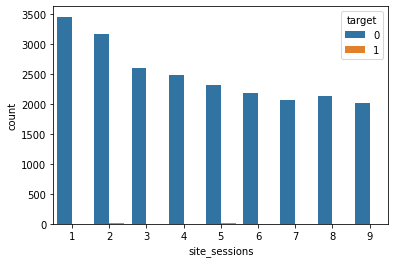

In [50]:
sns.countplot(x='site_sessions', data=train_df[train_df['site_sessions']<10], hue=y_train) 

In [49]:
compare = pd.concat([train_df['site_sessions'], y_train], axis=1)
compare.groupby('target').agg([np.mean, np.std, np.min, np.max])

site_sessions                    
                mean       std amin amax
target                                  
0           9.512350  1.742295    1   10
1           9.912495  0.734720    1   10

In [59]:
#number of same sites per session
#count number of distinct sites in a single session / total sites in session
train_df['distinct_sites'] = train_df[sites].nunique(axis=1)
train_df['mean_distinct_sites'] = train_df['distinct_sites'] / train_df['site_sessions']

In [60]:
train_df.head()

,site1,site2,site3,site4,site5,site6,site7,site8,site9,site10,site_sessions,distinct_sites,mean_distinct_sites
0,718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1.0
1,890,941.0,3847.0,941.0,942.0,3846.0,3847.0,3846.0,1516.0,1518.0,10,7,0.7
2,14769,39.0,14768.0,14769.0,37.0,39.0,14768.0,14768.0,14768.0,14768.0,10,4,0.4
3,782,782.0,782.0,782.0,782.0,782.0,782.0,782.0,782.0,782.0,10,1,0.1
4,22,177.0,175.0,178.0,177.0,178.0,175.0,177.0,177.0,178.0,10,4,0.4


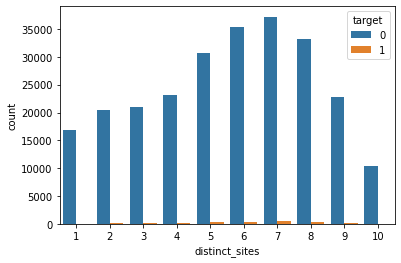

In [61]:
sns.countplot(x='distinct_sites', data=train_df, hue=y_train)